# Linear Regression from scratch

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Creating dataset using make_regression
X,y= make_regression(n_samples=100, n_features=1,n_targets=1,noise=20,random_state=24)

In [3]:
# Splitting training and test data
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=24)

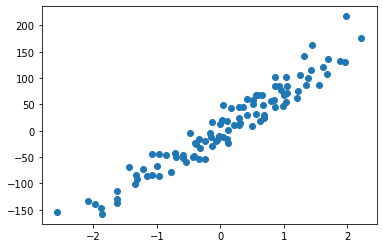

In [4]:
# Visualizing data using matplotlib
plt.scatter(X,y)
plt.show()

In [5]:
# Step 1: Randomly initalize the parameteres for our hypothesis function

def param_init(X):
    
    #Initializing the parameters for Linear Regression Model
    params={}
    
    #Getting the no. of features
    _, n_features = X.shape  #Shape of training data
    
    # X = w*y + b  
    #Initilaizing the coefficients(i.e w,b) to zero
    params["W"]=np.zeros(n_features)
    params["b"]=0
    return params

In [6]:
# Step 2: Calculate the partial derivatives and then update parameters (until cost function is minimized)
          # We will be using "Gradient Descent" Algorithm for this purpose
    
def gradient_descent(X, y, params, alpha, n_iter):
    
    W=params['W'] # weights
    b=params["b"] # biases
    m=X.shape[0]  # no. of training instances
    
    
    for _ in range(n_iter):
        
        #Prediction with random weights 
        y_pred = np.dot(X,W) + b
        
        #Taking the partial derivative of the coefficients
        dW = (2/m) * np.dot(X.T, (y_pred-y))
        db = (2/m) * np.sum(y_pred-y)
        W -= alpha * dW
        b -= alpha * db
        
        #Updating the coefficients
        params["W"] = W
        params["b"] = b
        
    return params

In [7]:
# Step 3: Training our linear regression model 

def train(X, y, alpha = 0.01, n_iter = 1000):
    init_params = param_init(X) #initializing the parameters
    params = gradient_descent(X, y, init_params, alpha, n_iter) #Minimising cost function
    return params

In [8]:
# Step 4: Predict function for inference that uses stored weights

def predict(X_test, params):
    y_preds = np.dot(X_test, params["W"]) + params["b"]
    return y_preds

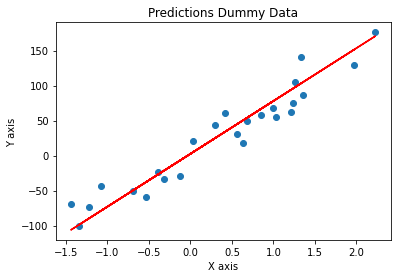

In [9]:
# Step 5: Final Implementation

params = train(X_train, y_train) #Model_Training
 
y_preds = predict(X_test, params) #Inference

#Plotting the graph
plt.scatter(X_test, y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [10]:
# Step 6: Checking the "RMSE" of implementation vs Scikit-learn

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
sklearn_y_preds = lin_reg.predict(X_test)

print(f"From Scratch Implementation : {np.sqrt(mean_squared_error(y_test,y_preds))} \nSklearn Implementation: {np.sqrt(mean_squared_error(y_test, sklearn_y_preds))}")


From Scratch Implementation : 20.986105292320207 
Sklearn Implementation: 20.98610530754737


Yay! We got same result :)